In [120]:
import requests
import pandas as pd
import numpy as np
import ipywidgets as widgets
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [121]:
def get_data(team_id_data):
  response = requests.get(
      "https://api.football-data.org/v4/teams/" + str(team_id_data) + "/matches",
      headers={
          "X-Auth-Token": '4b76eb76f3f9476fad9da4c52b730aae'
      },
      params={
          "limit": 1000
      }
  )

  return response.json()

In [122]:
def predict(df_scores):
  df_scores['lag_1'] = df_scores['Score Difference'].shift(1)
  df_scores['lag_2'] = df_scores['Score Difference'].shift(2)
  df_scores = df_scores.dropna()

  X = df_scores[['lag_1', 'lag_2']]
  y = df_scores['Score Difference']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)

  latest_features = pd.DataFrame([df_scores[['lag_1', 'lag_2']].iloc[-1].values], columns=['lag_1', 'lag_2'])
  next_score = model.predict(latest_features)

  return next_score[0]

In [119]:
# @title Team selection
response_teams = requests.get(
    "https://api.football-data.org/v4/teams",
    headers={
        "X-Auth-Token": '4b76eb76f3f9476fad9da4c52b730aae'
    },
    params={
        "limit": 1000
    }
)

teams_data = response_teams.json()
teams = teams_data.get("teams", [])
teams_list = []

for team in teams:
    teams_list.append(str(team["name"]) + ' (id: ' + str(team["id"]) + ')')

teams_list.sort(key=str.lower)

team_id = 1
dropdown = widgets.Dropdown(
    options=teams_list,
    value=teams_list[0],
    disabled=False,
)

button = widgets.Button(description="Select")
def on_button_clicked(b):
    global selected_team, team_id
    selected_team = dropdown.value
    team_id = int(dropdown.value.split('(')[1].split(')')[0].split(' ')[1])

button.on_click(on_button_clicked)

display(dropdown)
display(button)

Dropdown(options=('1. FC Heidenheim 1846 (id: 44)', '1. FC Kaiserslautern (id: 13)', '1. FC Köln (id: 1)', '1.…

Button(description='Select', style=ButtonStyle())

In [151]:
data = get_data(team_id)
matches = data.get("matches", [])
if matches[0]["homeTeam"]["id"] == team_id:
  team_name = matches[0]["homeTeam"]["name"]
else:
  team_name = matches[0]["awayTeam"]["name"]

In [152]:
df = pd.DataFrame(
    [
        {
            "Area": match["area"]["name"],
            "Competition": match["competition"]["name"],
            "Matchday": match["matchday"],
            "Date": match["utcDate"].split('T')[0],
            "Status": match["status"],
            "Home Team": match["homeTeam"]["name"],
            "Away Team": match["awayTeam"]["name"],
            "Home Id": match["homeTeam"]["id"],
            "Away Id": match["awayTeam"]["id"],
            "Home Score": match["score"]["fullTime"]["home"],
            "Away Score": match["score"]["fullTime"]["away"],
            "Winner": match["score"]["winner"],
            "Referee": match["referees"][0]["name"] if match["referees"] else None,
            "Referee Nationality": match["referees"][0]["nationality"] if match["referees"] else None,
        }
        for match in matches
    ]
)

In [153]:
df

,Area,Competition,Matchday,Date,Status,Home Team,Away Team,Home Id,Away Id,Home Score,Away Score,Winner,Referee,Referee Nationality
0,France,Ligue 1,1,2024-08-18,FINISHED,Angers SCO,Racing Club de Lens,532,546,0.0,1.0,AWAY_TEAM,Thomas Léonard,France
1,France,Ligue 1,2,2024-08-25,FINISHED,Racing Club de Lens,Stade Brestois 29,546,512,2.0,0.0,HOME_TEAM,Jérémie Pignard,France
2,France,Ligue 1,3,2024-09-01,FINISHED,AS Monaco FC,Racing Club de Lens,548,546,1.0,1.0,DRAW,Willy Delajod,France
3,France,Ligue 1,4,2024-09-15,FINISHED,Racing Club de Lens,Olympique Lyonnais,546,523,0.0,0.0,DRAW,Bastien Dechepy,France
4,France,Ligue 1,5,2024-09-21,FINISHED,Stade Rennais FC 1901,Racing Club de Lens,529,546,1.0,1.0,DRAW,Jeremy Stinat,France
5,France,Ligue 1,6,2024-09-28,FINISHED,Racing Club de Lens,OGC Nice,546,522,0.0,0.0,DRAW,François Letexier,France
6,France,Ligue 1,7,2024-10-06,FINISHED,RC Strasbourg Alsace,Racing Club de Lens,576,546,2.0,2.0,DRAW,Stéphanie Frappart,France
7,France,Ligue 1,8,2024-10-19,FINISHED,AS Saint-Étienne,Racing Club de Lens,527,546,0.0,2.0,AWAY_TEAM,Romain Lissorgue,France
8,France,Ligue 1,9,2024-10-26,FINISHED,Racing Club de Lens,Lille OSC,546,521,0.0,2.0,AWAY_TEAM,Benoît Bastien,France
9,France,Ligue 1,10,2024-11-02,FINISHED,Paris Saint-Germain FC,Racing Club de Lens,524,546,1.0,0.0,HOME_TEAM,Willy Delajod,France


In [140]:
df["Date"] = pd.to_datetime(df["Date"])
timed_matches = df[df["Status"] != "FINISHED"].sort_values(by="Date")
next_match = timed_matches.iloc[0]
main_match_competation = next_match["Competition"]
if next_match["Home Id"] == team_id:
  opposing_team_id = next_match["Away Id"]
  opposing_team_name = next_match["Away Team"]
else:
  opposing_team_id = next_match["Home Id"]
  opposing_team_name = next_match["Home Team"]
datetime_str = str(next_match['Date']).split(' ')[0]
next_match_date = datetime.strptime(datetime_str, '%Y-%m-%d')
next_match

,21
Area,England
Competition,Premier League
Matchday,22
Date,2025-01-20 00:00:00
Status,TIMED
Home Team,Chelsea FC
Away Team,Wolverhampton Wanderers FC
Home Id,61
Away Id,76
Home Score,NaN


In [141]:
df = df[df["Status"] == "FINISHED"]
df

,Area,Competition,Matchday,Date,Status,Home Team,Away Team,Home Id,Away Id,Home Score,Away Score,Winner,Referee,Referee Nationality
0,England,Premier League,1,2024-08-18,FINISHED,Chelsea FC,Manchester City FC,61,65,0.0,2.0,AWAY_TEAM,Anthony Taylor,England
1,England,Premier League,2,2024-08-25,FINISHED,Wolverhampton Wanderers FC,Chelsea FC,76,61,2.0,6.0,AWAY_TEAM,Darren England,England
2,England,Premier League,3,2024-09-01,FINISHED,Chelsea FC,Crystal Palace FC,61,354,1.0,1.0,DRAW,Jarred Gillett,Australia
3,England,Premier League,4,2024-09-14,FINISHED,AFC Bournemouth,Chelsea FC,1044,61,0.0,1.0,AWAY_TEAM,Anthony Taylor,England
4,England,Premier League,5,2024-09-21,FINISHED,West Ham United FC,Chelsea FC,563,61,0.0,3.0,AWAY_TEAM,Sam Barrott,England
5,England,Premier League,6,2024-09-28,FINISHED,Chelsea FC,Brighton & Hove Albion FC,61,397,4.0,2.0,HOME_TEAM,Peter Bankes,England
6,England,Premier League,7,2024-10-06,FINISHED,Chelsea FC,Nottingham Forest FC,61,351,1.0,1.0,DRAW,Chris Kavanagh,England
7,England,Premier League,8,2024-10-20,FINISHED,Liverpool FC,Chelsea FC,64,61,2.0,1.0,HOME_TEAM,John Brooks,England
8,England,Premier League,9,2024-10-27,FINISHED,Chelsea FC,Newcastle United FC,61,67,2.0,1.0,HOME_TEAM,Simon Hooper,England
9,England,Premier League,10,2024-11-03,FINISHED,Manchester United FC,Chelsea FC,66,61,1.0,1.0,DRAW,Robert Jones,England


In [142]:
finished_matches = [match for match in matches if match["status"] == "FINISHED"]
df_scores_team = pd.DataFrame(
    [
        {
            "Date": match["utcDate"].split('T')[0],
            "Score Difference": int(match["score"]["fullTime"]["home"]) - int(match["score"]["fullTime"]["away"])
            if match["homeTeam"]["id"] == team_id
            else int(match["score"]["fullTime"]["away"]) - int(match["score"]["fullTime"]["home"])
        }
        for match in finished_matches
    ]
)
df_scores_team['Date'] = pd.to_datetime(df_scores_team['Date'])
df_scores_team.set_index('Date', inplace=True)
df_scores_team

,Score Difference
Date,
2024-08-18,-2
2024-08-25,4
2024-09-01,0
2024-09-14,1
2024-09-21,3
2024-09-28,2
2024-10-06,0
2024-10-20,-1
2024-10-27,1


In [143]:
data_opposing = get_data(opposing_team_id)
matches_opposing = data_opposing.get("matches", [])

In [144]:
df_opposing = pd.DataFrame(
    [
        {
            "Area": match["area"]["name"],
            "Competition": match["competition"]["name"],
            "Matchday": match["matchday"],
            "Date": match["utcDate"].split('T')[0],
            "Status": match["status"],
            "Home Team": match["homeTeam"]["name"],
            "Away Team": match["awayTeam"]["name"],
            "Home Id": match["homeTeam"]["id"],
            "Away Id": match["awayTeam"]["id"],
            "Home Score": match["score"]["fullTime"]["home"],
            "Away Score": match["score"]["fullTime"]["away"],
            "Winner": match["score"]["winner"],
            "Referee": match["referees"][0]["name"] if match["referees"] else None,
            "Referee Nationality": match["referees"][0]["nationality"] if match["referees"] else None,
        }
        for match in matches_opposing
    ]
)

In [145]:
df_opposing

,Area,Competition,Matchday,Date,Status,Home Team,Away Team,Home Id,Away Id,Home Score,Away Score,Winner,Referee,Referee Nationality
0,England,Premier League,1,2024-08-17,FINISHED,Arsenal FC,Wolverhampton Wanderers FC,57,76,2.0,0.0,HOME_TEAM,Jarred Gillett,Australia
1,England,Premier League,2,2024-08-25,FINISHED,Wolverhampton Wanderers FC,Chelsea FC,76,61,2.0,6.0,AWAY_TEAM,Darren England,England
2,England,Premier League,3,2024-08-31,FINISHED,Nottingham Forest FC,Wolverhampton Wanderers FC,351,76,1.0,1.0,DRAW,Simon Hooper,England
3,England,Premier League,4,2024-09-15,FINISHED,Wolverhampton Wanderers FC,Newcastle United FC,76,67,1.0,2.0,AWAY_TEAM,Chris Kavanagh,England
4,England,Premier League,5,2024-09-21,FINISHED,Aston Villa FC,Wolverhampton Wanderers FC,58,76,3.0,1.0,HOME_TEAM,Tim Robinson,England
5,England,Premier League,6,2024-09-28,FINISHED,Wolverhampton Wanderers FC,Liverpool FC,76,64,1.0,2.0,AWAY_TEAM,Anthony Taylor,England
6,England,Premier League,7,2024-10-05,FINISHED,Brentford FC,Wolverhampton Wanderers FC,402,76,5.0,3.0,HOME_TEAM,Andy Madley,England
7,England,Premier League,8,2024-10-20,FINISHED,Wolverhampton Wanderers FC,Manchester City FC,76,65,1.0,2.0,AWAY_TEAM,Chris Kavanagh,England
8,England,Premier League,9,2024-10-26,FINISHED,Brighton & Hove Albion FC,Wolverhampton Wanderers FC,397,76,2.0,2.0,DRAW,Michael Oliver,England
9,England,Premier League,10,2024-11-02,FINISHED,Wolverhampton Wanderers FC,Crystal Palace FC,76,354,2.0,2.0,DRAW,Anthony Taylor,England


In [146]:
df_opposing["Date"] = pd.to_datetime(df["Date"])
opposing_next_match = df_opposing[df_opposing["Competition"] == main_match_competation].sort_values(by="Date")
opposing_next_match = opposing_next_match[opposing_next_match["Status"] != 'FINISHED'].sort_values(by="Date")
opposing_next_match = opposing_next_match.iloc[0]
opposing_next_match

,21
Area,England
Competition,Premier League
Matchday,22
Date,NaT
Status,TIMED
Home Team,Chelsea FC
Away Team,Wolverhampton Wanderers FC
Home Id,61
Away Id,76
Home Score,NaN


In [147]:
df_opposing = df_opposing[df_opposing["Status"] == "FINISHED"]
df_opposing

,Area,Competition,Matchday,Date,Status,Home Team,Away Team,Home Id,Away Id,Home Score,Away Score,Winner,Referee,Referee Nationality
0,England,Premier League,1,2024-08-18,FINISHED,Arsenal FC,Wolverhampton Wanderers FC,57,76,2.0,0.0,HOME_TEAM,Jarred Gillett,Australia
1,England,Premier League,2,2024-08-25,FINISHED,Wolverhampton Wanderers FC,Chelsea FC,76,61,2.0,6.0,AWAY_TEAM,Darren England,England
2,England,Premier League,3,2024-09-01,FINISHED,Nottingham Forest FC,Wolverhampton Wanderers FC,351,76,1.0,1.0,DRAW,Simon Hooper,England
3,England,Premier League,4,2024-09-14,FINISHED,Wolverhampton Wanderers FC,Newcastle United FC,76,67,1.0,2.0,AWAY_TEAM,Chris Kavanagh,England
4,England,Premier League,5,2024-09-21,FINISHED,Aston Villa FC,Wolverhampton Wanderers FC,58,76,3.0,1.0,HOME_TEAM,Tim Robinson,England
5,England,Premier League,6,2024-09-28,FINISHED,Wolverhampton Wanderers FC,Liverpool FC,76,64,1.0,2.0,AWAY_TEAM,Anthony Taylor,England
6,England,Premier League,7,2024-10-06,FINISHED,Brentford FC,Wolverhampton Wanderers FC,402,76,5.0,3.0,HOME_TEAM,Andy Madley,England
7,England,Premier League,8,2024-10-20,FINISHED,Wolverhampton Wanderers FC,Manchester City FC,76,65,1.0,2.0,AWAY_TEAM,Chris Kavanagh,England
8,England,Premier League,9,2024-10-27,FINISHED,Brighton & Hove Albion FC,Wolverhampton Wanderers FC,397,76,2.0,2.0,DRAW,Michael Oliver,England
9,England,Premier League,10,2024-11-03,FINISHED,Wolverhampton Wanderers FC,Crystal Palace FC,76,354,2.0,2.0,DRAW,Anthony Taylor,England


In [148]:
opposing_finished_matches = [match for match in matches_opposing if match["status"] == "FINISHED"]
df_scores_opposing_team = pd.DataFrame(
    [
        {
            "Date": match["utcDate"].split('T')[0],
            "Score Difference": int(match["score"]["fullTime"]["home"]) - int(match["score"]["fullTime"]["away"])
            if match["homeTeam"]["id"] == opposing_team_id
            else int(match["score"]["fullTime"]["away"]) - int(match["score"]["fullTime"]["home"])
        }
        for match in opposing_finished_matches
    ]
)
df_scores_opposing_team['Date'] = pd.to_datetime(df_scores_opposing_team['Date'])
df_scores_opposing_team.set_index('Date', inplace=True)
df_scores_opposing_team

,Score Difference
Date,
2024-08-17,-2
2024-08-25,-4
2024-08-31,0
2024-09-15,-1
2024-09-21,-2
2024-09-28,-1
2024-10-05,-2
2024-10-20,-1
2024-10-26,0


In [149]:
predicted_score = predict(df_scores_team)
opposing_predicted_score = predict(df_scores_opposing_team)
average = (predicted_score + (opposing_predicted_score * -1)) / 2

print(team_name + " Predicted Score Difference: " + str(predicted_score))
print(opposing_team_name + " Predicted Score Difference: " + str(opposing_predicted_score))
print("Predicted Average Score Difference: " + str(average))
print("Predicted Average Score Difference (Rounded): " + str(round(average)))

Chelsea FC Predicted Score Difference: 0.8422783794624951
Wolverhampton Wanderers FC Predicted Score Difference: -2.121985157699443
Predicted Average Score Difference: 1.482131768580969
Predicted Average Score Difference (Rounded): 1


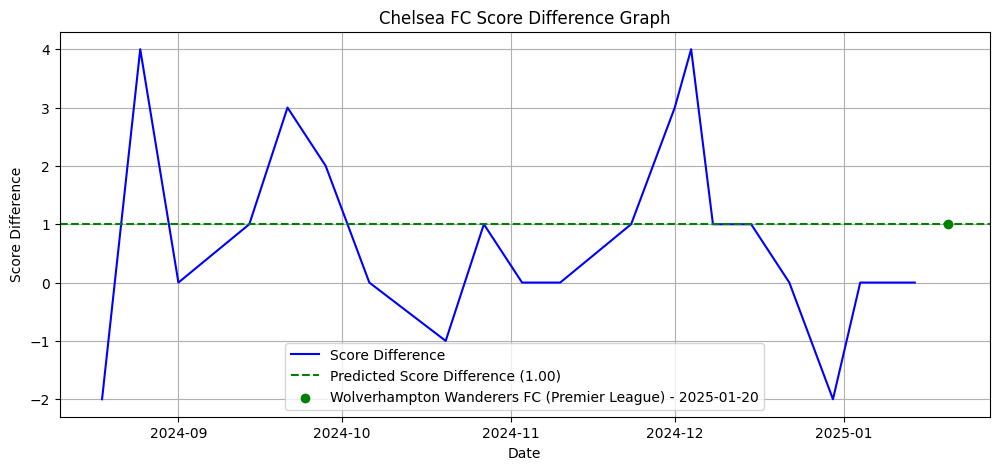

In [150]:
plt.figure(figsize=(12, 5))
plt.plot(df_scores_team.index, df_scores_team['Score Difference'], label='Score Difference', color='blue')

next_score_graph = int(str(round(average)).split('.')[0])
plt.axhline(y=next_score_graph, color='green', linestyle='--', label=f'Predicted Score Difference ({next_score_graph:.2f})')
plt.scatter([next_match_date], [next_score_graph], color='green', label=opposing_team_name + ' (' + main_match_competation + ') - ' + str(next_match_date).split(' ')[0], zorder=5)

plt.title(team_name + ' Score Difference Graph')
plt.xlabel('Date')
plt.ylabel('Score Difference')
plt.legend()
plt.grid()

plt.show()